### Problema 1

Rango para 99% de varianza: 16
Rango para 99% en norma Frobenius: 16
Rango para 99% de suma acumulativa: 1007


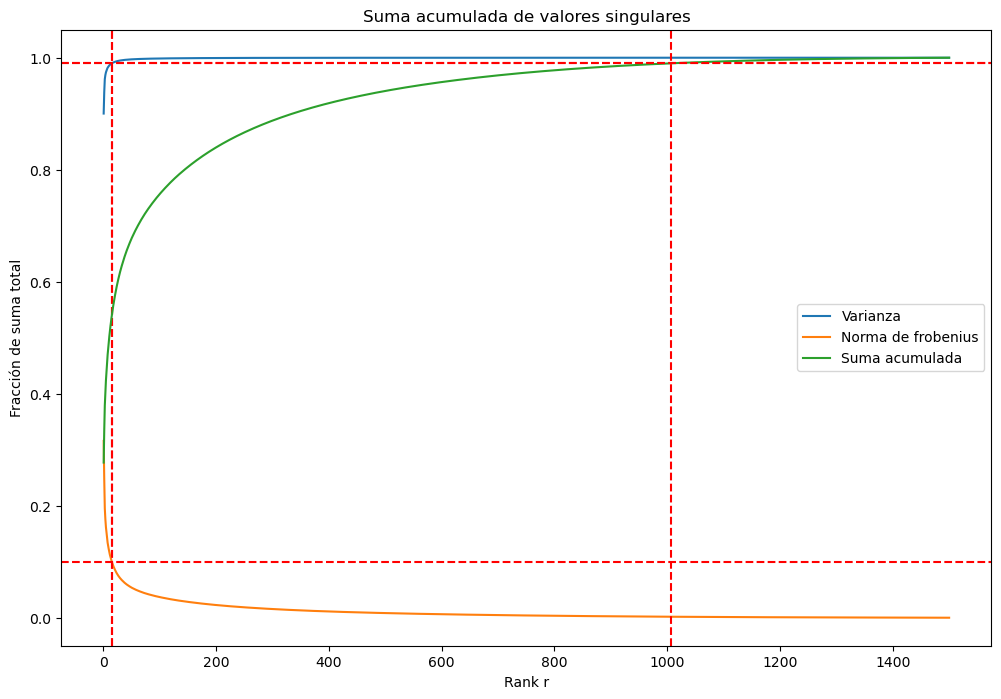

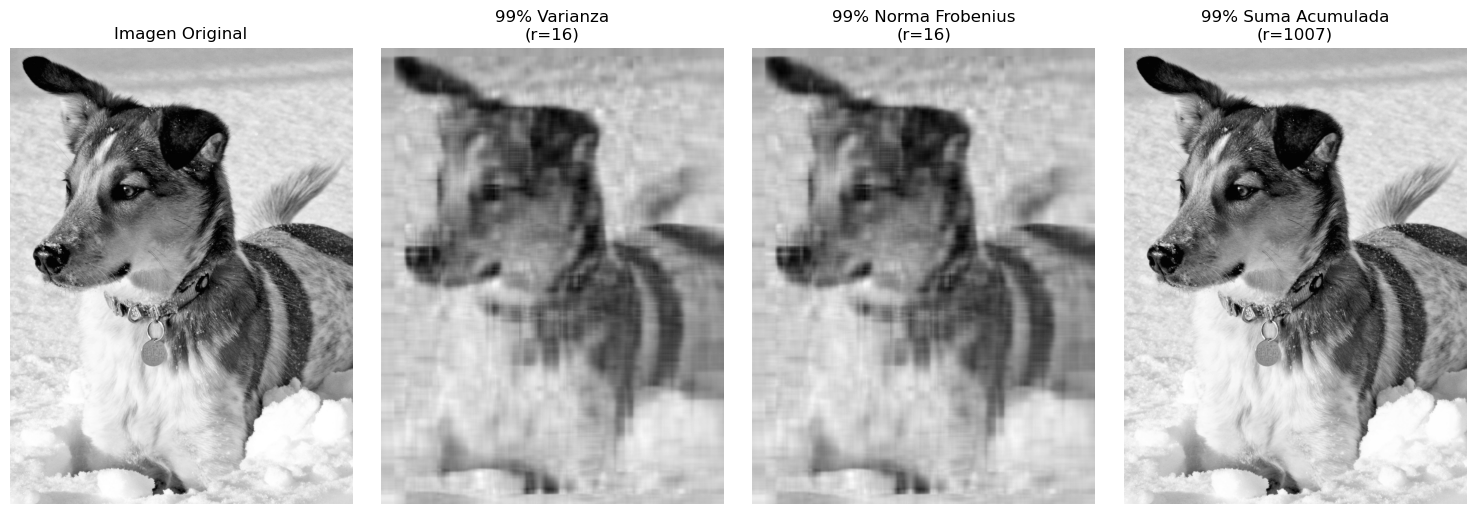

In [1]:
import os
import matplotlib.pyplot as plt
from matplotlib.image import imread
import numpy as np

# 1.Cargar imagen y convertir a escala de grises
A = imread('dog.jpg')
X= np.mean(A, -1)

# 2. Calcular SVD económico
U, s, Vt = np.linalg.svd(X, full_matrices=False)
S = np.diag(s)

# 3. Calcular métricas
norma_total = np.sum(s**2)  # Norma Frobenius al cuadrado
suma_acumulada = np.cumsum(s)
varianza_explicada = np.cumsum(s**2) / norma_total
error_relativo = np.sqrt(1 - varianza_explicada)
fraccion_varianza_perdida = 1 - varianza_explicada

# 4. Encontrar los rangos para 99%
r_varianza = np.argmax(varianza_explicada >= 0.99) + 1
r_norma = np.argmax(1 - error_relativo**2 >= 0.99) + 1
r_suma = np.argmax(suma_acumulada >= 0.99 * suma_acumulada[-1]) + 1

print(f"Rango para 99% de varianza: {r_varianza}")
print(f"Rango para 99% en norma Frobenius: {r_norma}")
print(f"Rango para 99% de suma acumulativa: {r_suma}")

# 5. Graficar
rangos = np.arange(1, len(s)+1)
plt.figure(figsize=(12, 8))

# Varianza explicada
plt.plot(rangos, varianza_explicada, label='Varianza' )
plt.axhline(0.99, color='r', linestyle='--')
plt.axvline(r_varianza, color='r', linestyle='--') 

# Error relativo
plt.plot(rangos, error_relativo,label='Norma de frobenius')
plt.axhline(np.sqrt(0.01), color='r', linestyle='--')  # sqrt(1-0.99)
plt.axvline(r_norma, color='r', linestyle='--')

# Suma acumulada
plt.plot(rangos, suma_acumulada/suma_acumulada[-1], label='Suma acumulada')
plt.axhline(0.99, color='r', linestyle='--')
plt.axvline(r_suma, color='r', linestyle='--')
plt.title('Suma acumulada de valores singulares')
plt.xlabel('Rank r')
plt.ylabel('Fracción de suma total')
plt.legend()
plt.show()

# 6. Mostrar comparación visual de las reconstrucciones
plt.figure(figsize=(15, 5))

# Imagen original
plt.subplot(1, 4, 1)
plt.imshow(X, cmap='gray')
plt.title('Imagen Original')
plt.axis('off')

# Reconstrucción con 99% de varianza
X_opt1 = U[:, :r_varianza] @ np.diag(s[:r_varianza]) @ Vt[:r_varianza, :]
plt.subplot(1, 4, 2)
plt.imshow(X_opt1, cmap='gray')
plt.title(f'99% Varianza\n(r={r_varianza})')
plt.axis('off')

# Reconstrucción con 99% en norma Frobenius
X_opt2 = U[:, :r_norma] @ np.diag(s[:r_norma]) @ Vt[:r_norma, :]
plt.subplot(1, 4, 3)
plt.imshow(X_opt2, cmap='gray')
plt.title(f'99% Norma Frobenius\n(r={r_norma})')
plt.axis('off')

# Reconstrucción con 99% suma acumulativa
X_opt3 = U[:, :r_suma] @ np.diag(s[:r_suma]) @ Vt[:r_suma, :]
plt.subplot(1, 4, 4)
plt.imshow(X_opt3, cmap='gray')
plt.title(f'99% Suma Acumulada\n(r={r_suma})')
plt.axis('off')

plt.tight_layout()
plt.show()

### Problema 2

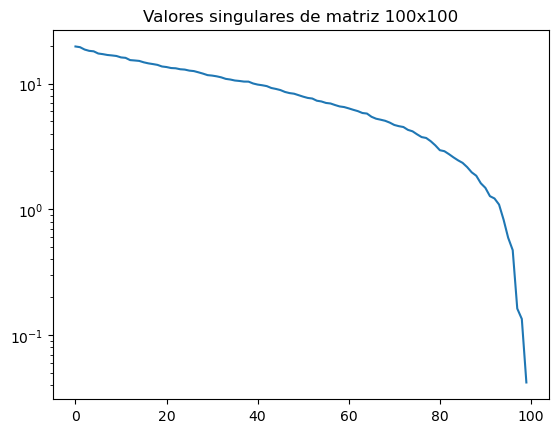

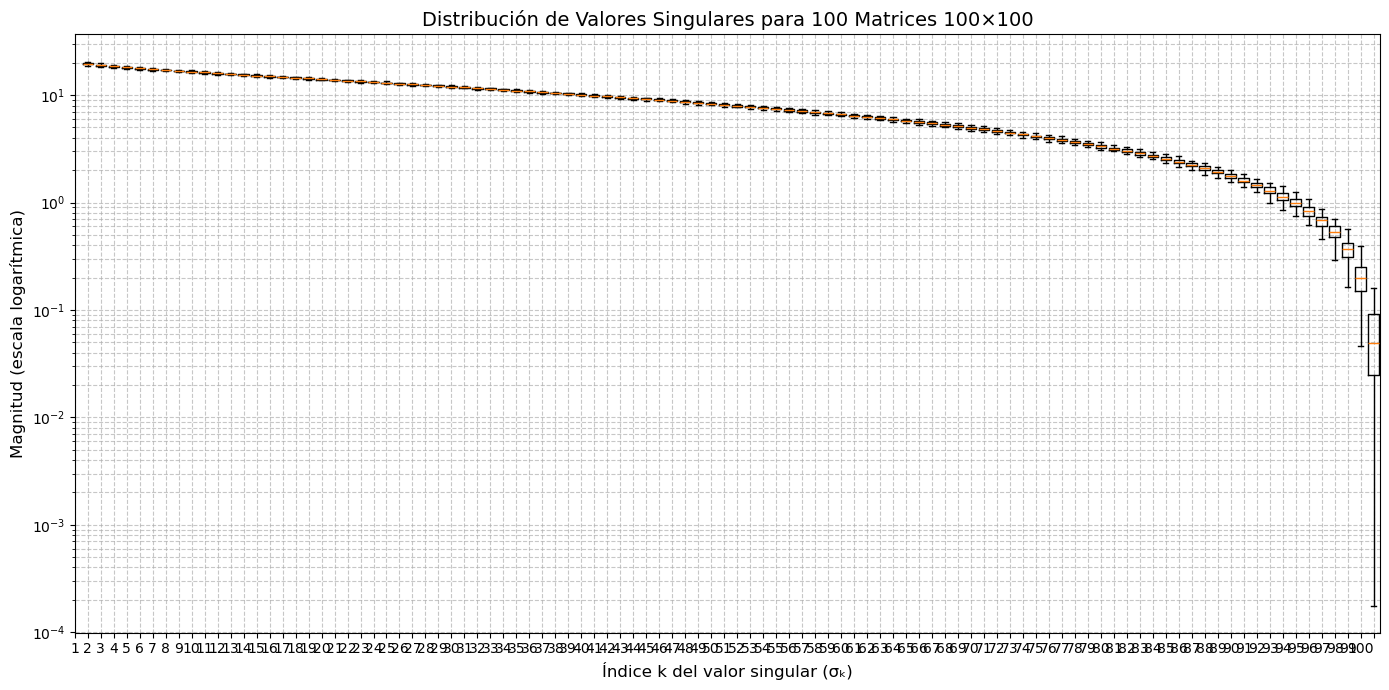

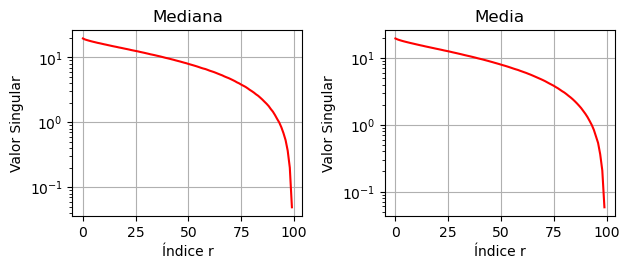

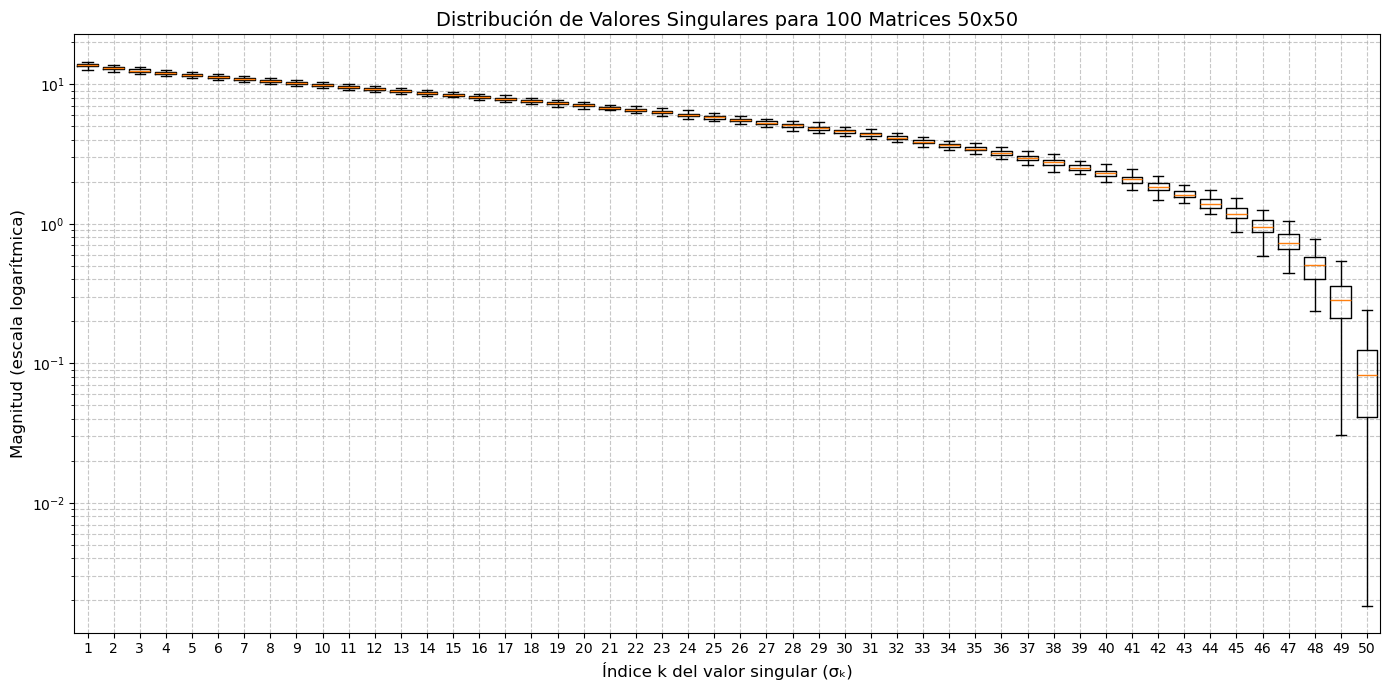

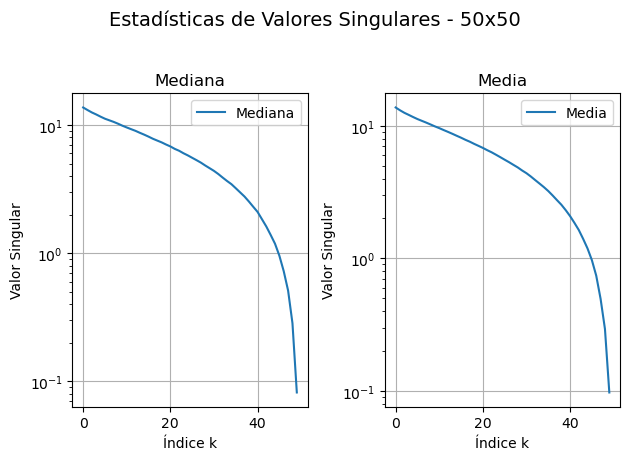

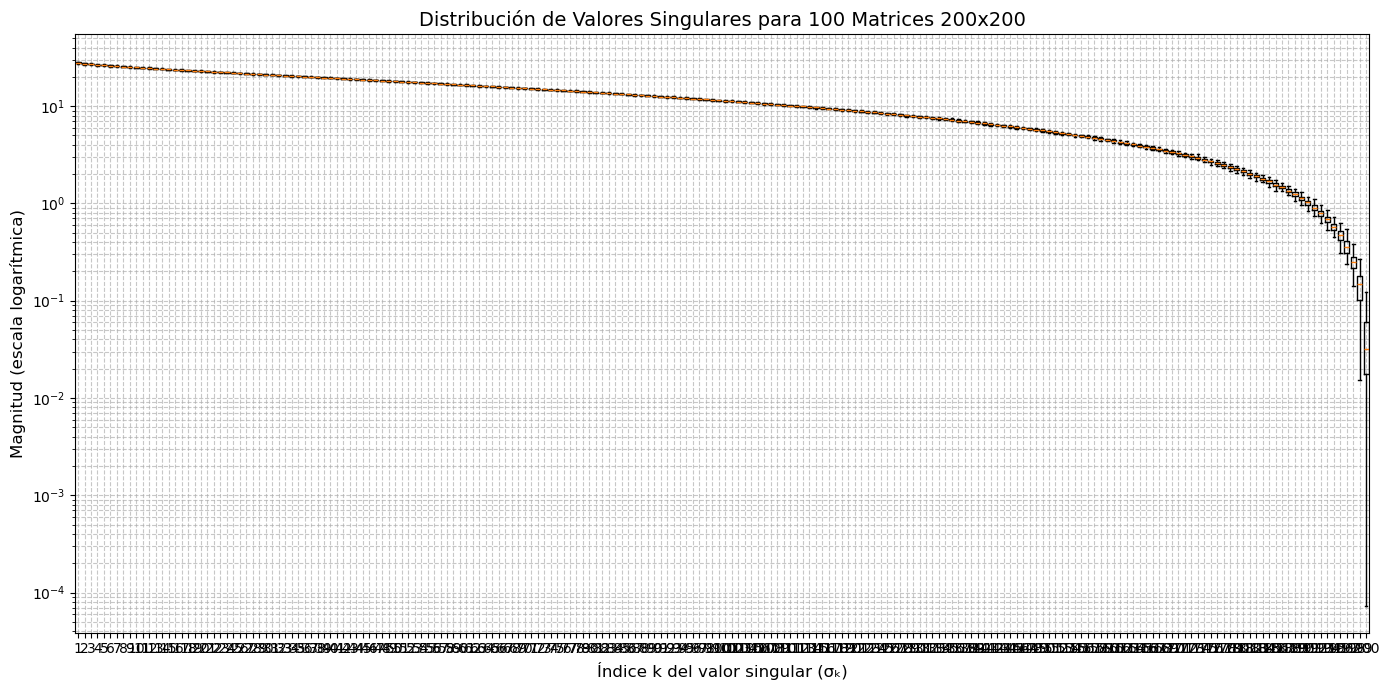

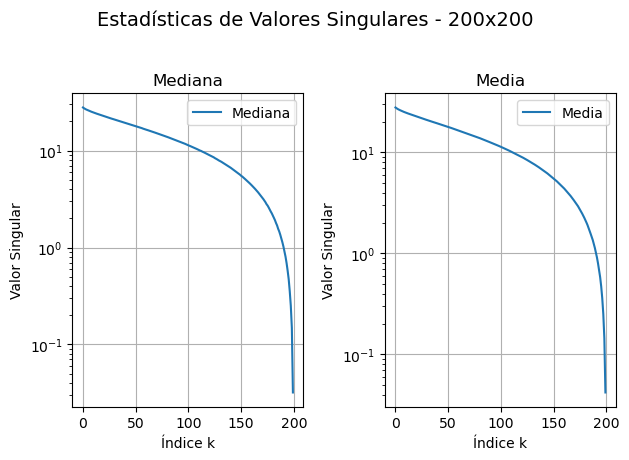

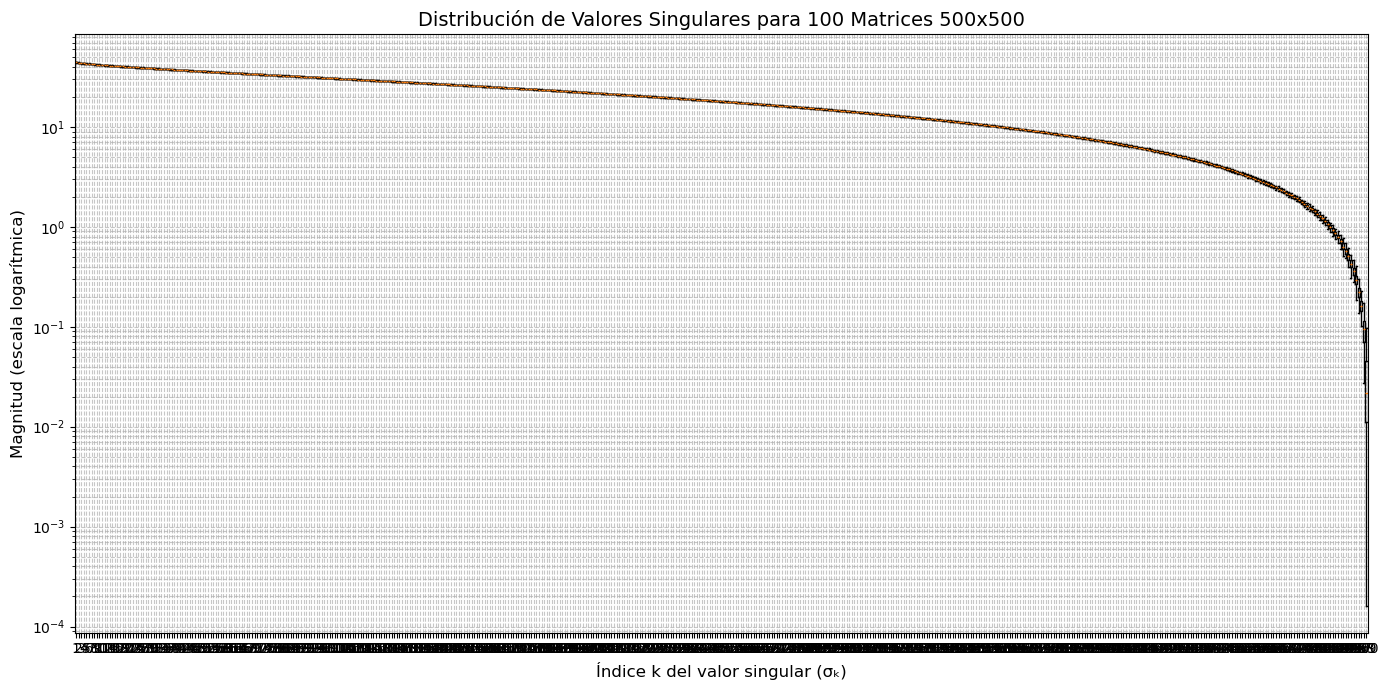

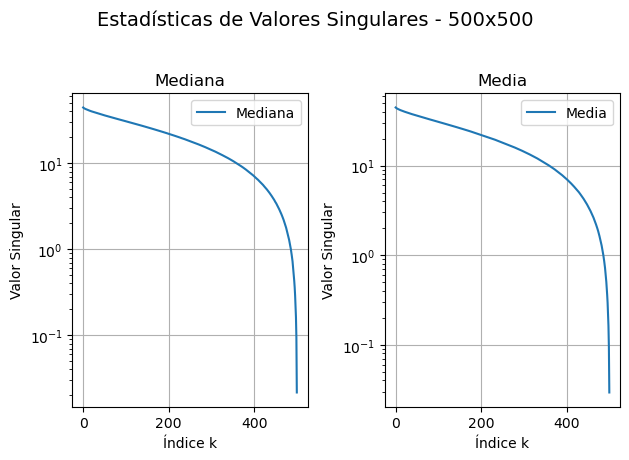

In [2]:
np.random.seed(42)
#1. Generar la matriz 100x100
matrix1=np.random.randn(100,100)

#2. Hacer la SVD económica
U1, s1, Vt1 = np.linalg.svd(matrix1, full_matrices=False)
S1 = np.diag(s1)

#3. Graficar los valores singulares 
plt.semilogy(np.diag(S1))
plt.title('Valores singulares de matriz 100x100')

#4. Repetir 100 veces los puntos 1,2
matrix=[]
S2=[]
estadisticas=[]
for _ in range(100):
    matriz_generada=np.random.randn(100,100)
    matrix.append(matriz_generada)
    sm = np.linalg.svd(matriz_generada, compute_uv=False)
    S2.append(sm)
    ###Media y mediana
    S2_array=np.array(S2)
    estadisticas={'mediana':np.median(S2_array, axis=0), 'media':np.mean(S2_array, axis=0)}
    
posiciones = np.arange(1, 101)

#5. Graficar las 100 matrices y media y mediana
plt.figure(figsize=(14, 7))
plt.boxplot(S2_array,positions=posiciones,showfliers=False, widths=0.8)
plt.title('Distribución de Valores Singulares para 100 Matrices 100×100', fontsize=14)
plt.xlabel('Índice k del valor singular (σₖ)', fontsize=12)
plt.ylabel('Magnitud (escala logarítmica)', fontsize=12)
plt.yscale('log')
plt.grid(True, which='both', linestyle='--', alpha=0.7)
plt.xticks(np.arange(0, 101))
plt.tight_layout()
plt.show()
for idx, (nombre,valores) in enumerate(estadisticas.items()):
    plt.subplot(2,2,idx+1)
    plt.plot(valores, color='r')
    plt.title(nombre.capitalize())
    plt.xlabel('Índice r')
    plt.ylabel('Valor Singular')
    plt.yscale('log')
    plt.grid(True)
plt.tight_layout()    
plt.show()

#6. Repetir para matrices (50x50), (200x200),(500x500)
import numpy as np
import matplotlib.pyplot as plt

matrices = [50, 200, 500]
tamaño = 100  # número de matrices por tamaño
matrices_gen = {}
Sss = {}
stats = {}

for tam in matrices:
    key = f'{tam}x{tam}'
    matrices_gen[key] = []
    Sss[key] = []

    for _ in range(tamaño):
        matriz = np.random.randn(tam, tam)
        matrices_gen[key].append(matriz)

        # Cálculo de valores singulares
        sm = np.linalg.svd(matriz, compute_uv=False)
        Sss[key].append(sm)
    Sss_array = np.array(Sss[key])
    
    # Estadísticas
    stats[key] = {'mediana': np.median(Sss_array, axis=0),'media': np.mean(Sss_array, axis=0)}

    # Graficar boxplot
    plt.figure(figsize=(14, 7))
    plt.boxplot(Sss_array, showfliers=False, widths=0.8)
    plt.title(f'Distribución de Valores Singulares para {tamaño} Matrices {key}', fontsize=14)
    plt.xlabel('Índice k del valor singular (σₖ)', fontsize=12)
    plt.ylabel('Magnitud (escala logarítmica)', fontsize=12)
    plt.yscale('log')
    plt.grid(True, which='both', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

    # Graficar media y mediana
    for idx, (nombre, valores) in enumerate(stats[key].items()):
        plt.subplot(1, 2, idx + 1)
        plt.plot(valores, label=nombre.capitalize())
        plt.title(nombre.capitalize())
        plt.xlabel('Índice k')
        plt.ylabel('Valor Singular')
        plt.yscale('log')
        plt.grid(True)
        plt.legend()

    plt.suptitle(f'Estadísticas de Valores Singulares - {key}', fontsize=14)
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()


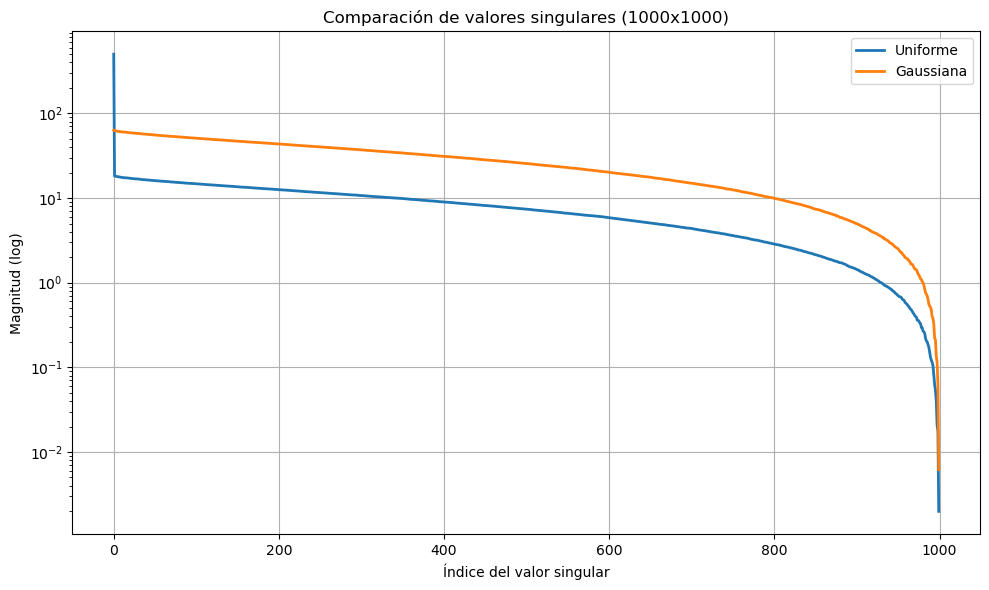

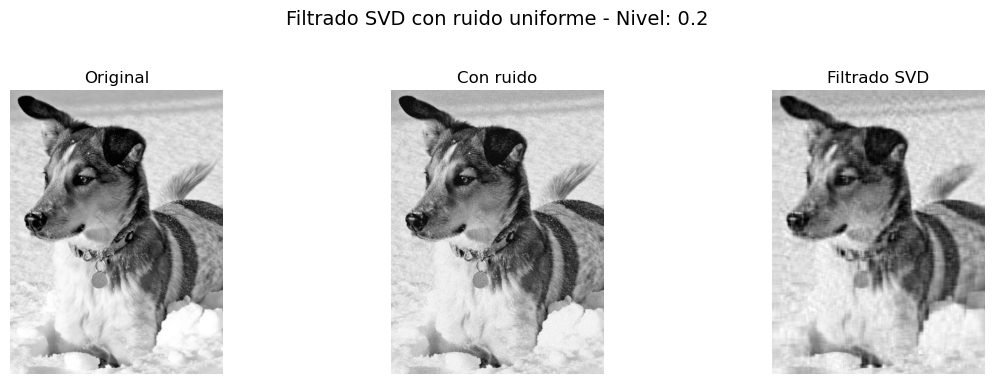

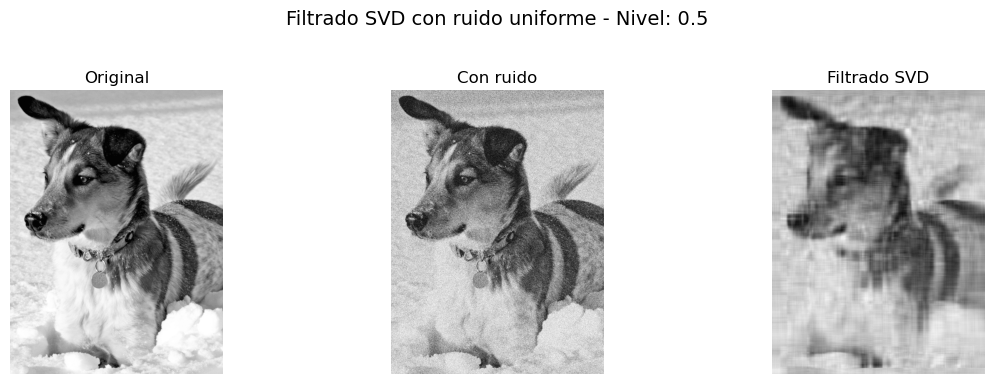

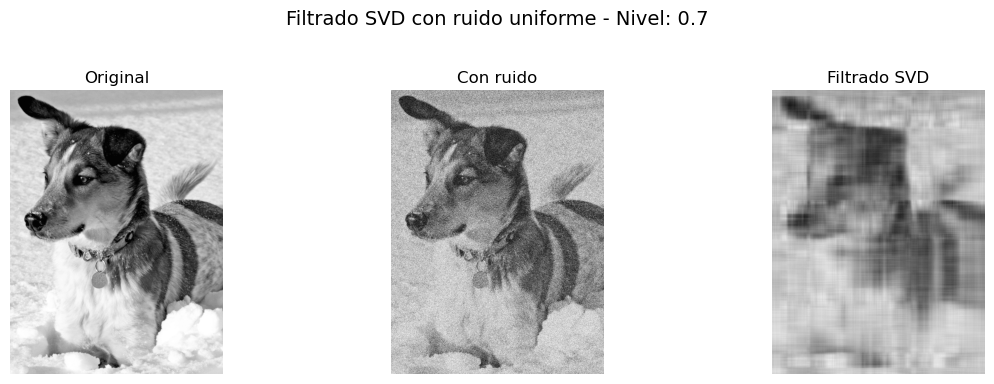

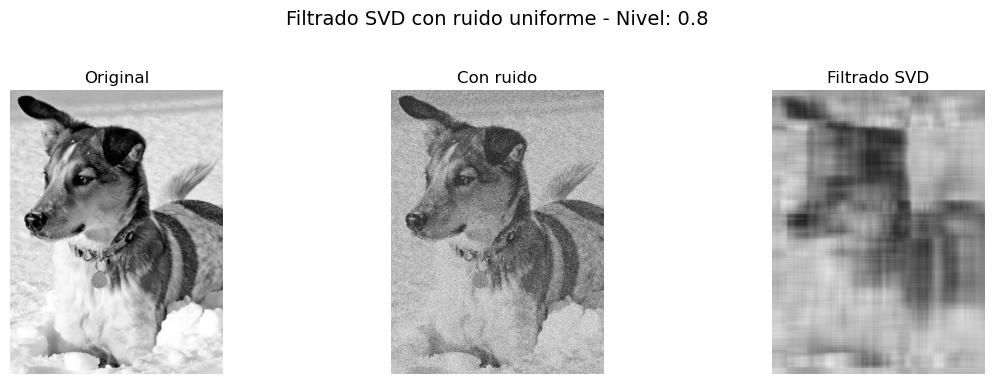

In [5]:
from skimage import color
from skimage.util import random_noise
from scipy.linalg import svd

A= np.mean(A, -1)
A = A / 255.0  # Normalizar a [0,1]

# 1. Comparar distribuciones SVD
# Crear matrices uniformes y gaussianas
uniform_matrix = np.random.uniform(low=0, high=1, size=(1000, 1000))
gaussian_matrix = np.random.randn(1000, 1000)

# Calcular valores singulares
s_uniform = svd(uniform_matrix, compute_uv=False)
s_gaussian = svd(gaussian_matrix, compute_uv=False)

# Graficar
plt.figure(figsize=(10, 6))
plt.plot(s_uniform, label='Uniforme', linewidth=2)
plt.plot(s_gaussian, label='Gaussiana', linewidth=2)
plt.yscale('log')
plt.title("Comparación de valores singulares (1000x1000)")
plt.xlabel("Índice del valor singular")
plt.ylabel("Magnitud (log)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# 2. Umbral de Gavish-Donoho
def gavish_donoho_threshold(s, beta):
    """Umbral óptimo basado en Gavish-Donoho."""
    omega = 0.56 * beta**3 - 0.95 * beta**2 + 1.82 * beta + 1.43
    median_sigma = np.median(s)
    return omega * median_sigma

# 3. Agregar ruido y filtrar

def denoise_with_svd(image, noise_type='uniform', noise_level=0.1):
    # Agregar ruido
    if noise_type == 'uniform':
        noisy = image + noise_level * np.random.uniform(low=-1, high=1, size=image.shape)
    elif noise_type == 'gaussian':
        noisy = image + noise_level * np.random.randn(*image.shape)
    noisy = np.clip(noisy, 0, 1)
    
    # SVD
    U, S, Vt = svd(noisy, full_matrices=False)
    beta = image.shape[0] / image.shape[1]
    tau = gavish_donoho_threshold(S, beta)
    S_thresholded = np.where(S > tau, S, 0)

    # Reconstrucción
    filtered = np.dot(U * S_thresholded, Vt)
    filtered = np.clip(filtered, 0, 1)
    return noisy, filtered

# 4. Comparar para distintos niveles de ruido

noise_levels = [0.2, 0.5, 0.7, 0.8]

for nl in noise_levels:
    noisy, filtered = denoise_with_svd(A, noise_type='uniform', noise_level=nl)
    
    plt.figure(figsize=(12, 4))
    plt.suptitle(f'Filtrado SVD con ruido uniforme - Nivel: {nl}', fontsize=14)
    
    plt.subplot(1, 3, 1)
    plt.imshow(A, cmap='gray')
    plt.title('Original')
    plt.axis('off')
    
    plt.subplot(1, 3, 2)
    plt.imshow(noisy, cmap='gray')
    plt.title('Con ruido')
    plt.axis('off')
    
    plt.subplot(1, 3, 3)
    plt.imshow(filtered, cmap='gray')
    plt.title('Filtrado SVD')
    plt.axis('off')
    
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()
